In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import plotly.express as px

from sklearn import model_selection
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error

import pickle

import sys

import glob

## Dataset elegido: big_data_5, el modelo base: Random Forest

### Abre el dataset elegido en el notebook "baseline_models_comparison"

In [2]:
big_data_5 = pd.read_csv("../data/output_data_5/big_data_no_outliers_cols_3.csv")
big_data_5 = big_data_5.drop(["Unnamed: 0"], axis=1)
# big_data_5 = big_data_5.rename({"bathrooms_text": "no_of_bathrooms"}, axis=1)
big_data_5.head()

,id,minimum_nights,idealista_rental(EUR/m2/month),ine_num_vacation_rental,calculated_host_listings_count,ine_num_tourists_vacation_rental,reviews_per_month,ine_percent_vacation_rental,idealista_sell(EUR/m2),availability_365,...,license,last_review,onehot__state_Andalucía,onehot__state_Cataluña,onehot__state_Comunidad Valenciana,onehot__state_Comunidad de Madrid,onehot__state_Islas Baleares,onehot__state_La Rioja,onehot__state_País Vasco,price
0,18674,1,14.7,49265,20,63894,0.28,1.28,2328,264,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,129
1,23197,4,14.7,49265,2,63894,0.45,1.28,2328,255,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,195
2,32711,2,14.7,49265,3,63894,0.60,1.28,2328,276,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,73
3,34981,5,14.7,49265,1,63894,1.28,1.28,2328,139,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,174
4,36763,31,14.7,49265,1,63894,0.76,1.28,2328,259,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,36


In [3]:
big_data_5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90577 entries, 0 to 90576
Data columns (total 23 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   id                                  90577 non-null  int64  
 1   minimum_nights                      90577 non-null  int64  
 2   idealista_rental(EUR/m2/month)      90577 non-null  float64
 3   ine_num_vacation_rental             90577 non-null  int64  
 4   calculated_host_listings_count      90577 non-null  int64  
 5   ine_num_tourists_vacation_rental    90577 non-null  int64  
 6   reviews_per_month                   90577 non-null  float64
 7   ine_percent_vacation_rental         90577 non-null  float64
 8   idealista_sell(EUR/m2)              90577 non-null  int64  
 9   availability_365                    90577 non-null  int64  
 10  number_of_reviews_ltm               90577 non-null  int64  
 11  number_of_reviews                   90577

## 1) Optimización del RandomForest con el Grid Search

### Búsqueda de mejores hiperparámetros (tarda approx 15 min.)

In [4]:
# X = big_data_5.iloc[:, 1:-1]
# y = big_data_5["price"]

# # Split the data into train and test
# X_train, X_test, y_train, y_test = model_selection.train_test_split(X,
#                                                                     y,
#                                                                     test_size=0.20,
#                                                                     random_state=42)

# # Standardize the data
# scaler = StandardScaler()
# scaler.fit(X_train)
# X_train_scaled = scaler.transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# # Define the parameter grid to search over
# param_grid = {
#     'n_estimators': [150, 200, 250, 300, 350, 400, 450, 500],
#     'max_depth': [10, 20, 30, None],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4]
# }

# # Create a RandomForestRegressor
# rf = RandomForestRegressor(random_state=42)

# # Use GridSearchCV to search over the parameter grid
# grid_search = GridSearchCV(rf, param_grid=param_grid, cv=5, n_jobs=-1)

# # Fit the model on the training data
# grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [150, 200, 250, 300, 350, 400, 450,
                                          500]})

In [5]:
# # Print the best parameters and the best score
# print("Best parameters: ", grid_search.best_params_)
# print("Best score: ", grid_search.best_score_)

Best parameters:  {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 250}
Best score:  0.5210554938086494


GridSearch Best Parameters and Score:
- Best parameters:  {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 250}
- Best score:  0.5210554938086494

Voy a probar estos hiperparámetros

In [16]:
sys.path.insert(0, '../functions')
import run_baseline_model as bm


bm.train_random_forest(X=big_data_5.iloc[:, 1:-1], y=big_data_5["price"], random_state=42, 
                       max_depth=20,
                       min_samples_leaf=1,
                       min_samples_split=2,
                       n_estimators=250,
                       path1="../data/output_optimization/big/baseline_feature_importances.csv",
                       path2="../data/output_optimization/big/metrics_1.csv")

c:\Users\Selvie\OneDrive\SELVIE\Lifelong Learning\The Bridge - Data Science Bootcamp\MyCode\3-Machine_Learning\Entrega\Proyecto ML\Airbnb\notebooks\../functions\run_baseline_model.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_df = metrics_df.append(pd.Series(metrics_test, index=metrics_df.columns), ignore_index=True)
c:\Users\Selvie\OneDrive\SELVIE\Lifelong Learning\The Bridge - Data Science Bootcamp\MyCode\3-Machine_Learning\Entrega\Proyecto ML\Airbnb\notebooks\../functions\run_baseline_model.py:69: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_df = metrics_df.append(pd.Series(metrics_train, index=metrics_df.columns), ignore_index=True)


(Pipeline(steps=[('scaler', StandardScaler()),
                 ('model',
                  RandomForestRegressor(max_depth=20, n_estimators=250,
                                        random_state=42))]),
                 Model          MSE       RMSE        MAE       MAPE        R2
 0   RandomForest_Test  3004.271876  54.811239  39.936086  41.865388  0.397212
 1  RandomForest_Train  1176.504183  34.300207  24.227952  25.038833  0.766427)

In [17]:
# Abre las métricas del modelo base
res_big_5 = pd.read_csv("../data/output_data_5/metrics_big_data_no_outliers_cols_3.csv")
res_big_5[res_big_5["MAE"] == (res_big_5["MAE"].min())]

,Model,MSE,RMSE,MAE,MAPE,R2
0,RandomForest,3101.82247,55.694007,40.526673,0.424958,0.377639


Comentario:
- Se ve que el RMSE de "test" ha bajado del 55.69 (baseline) al 54.81 y el MAE de "test" ha bajado del 40.52 (baseline) al 39.94 (sobre el precio promedio: 99 EUR/noche). Aunque las métricas han mejorado, pero no es una mejora significativa.
- En el modelo optimizado, los datos de "train" demuestran un buen rendimiento. 
- Quizás si tuviese más datos para entrenar, se podría mejorar el modelo.

## 2) Optimización del RandomForest con el Feature Importance

In [18]:
feat_imp = pd.read_csv("../data/output_optimization/big/baseline_feature_importances.csv")
feat_imp = feat_imp.drop("Unnamed: 0", axis=1)
feat_imp

,Feature,Importance
0,room_type,2.163258e-01
1,availability_365,1.712373e-01
2,calculated_host_listings_count,1.516744e-01
3,reviews_per_month,1.324710e-01
4,number_of_reviews,8.045867e-02
5,minimum_nights,7.503091e-02
6,ine_num_tourists_vacation_rental,5.415054e-02
7,number_of_reviews_ltm,5.304814e-02
8,license,2.188103e-02
9,last_review,1.092021e-02


In [19]:
feat_imp[:25].cumsum()

,Feature,Importance
0,room_type,0.216326
1,room_typeavailability_365,0.387563
2,room_typeavailability_365calculated_host_listi...,0.539238
3,room_typeavailability_365calculated_host_listi...,0.671709
4,room_typeavailability_365calculated_host_listi...,0.752167
5,room_typeavailability_365calculated_host_listi...,0.827198
6,room_typeavailability_365calculated_host_listi...,0.881349
7,room_typeavailability_365calculated_host_listi...,0.934397
8,room_typeavailability_365calculated_host_listi...,0.956278
9,room_typeavailability_365calculated_host_listi...,0.967198


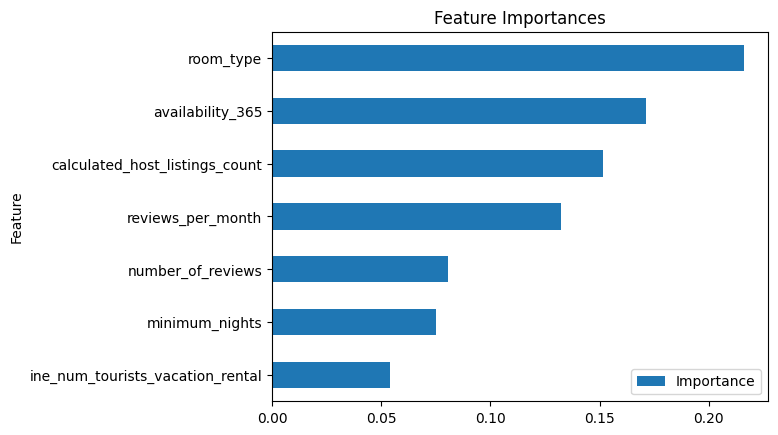

In [20]:
# Contribuyen un 0.881349
sorted_importances = feat_imp[:7].sort_values(by="Importance", ascending=True)
ax = sorted_importances.plot.barh(x="Feature", y="Importance")
ax.set_title("Feature Importances")
plt.show()

In [21]:
list(feat_imp[:7]["Feature"].unique())

['room_type',
 'availability_365',
 'calculated_host_listings_count',
 'reviews_per_month',
 'number_of_reviews',
 'minimum_nights',
 'ine_num_tourists_vacation_rental']

In [22]:
big_data_5[["id"] + list(feat_imp[:7]["Feature"].unique()) + ["price"]]

,id,room_type,availability_365,calculated_host_listings_count,reviews_per_month,number_of_reviews,minimum_nights,ine_num_tourists_vacation_rental,price
0,18674,3.0,264,20,0.28,33,1,63894,129
1,23197,3.0,255,2,0.45,65,4,63894,195
2,32711,3.0,276,3,0.60,83,2,63894,73
3,34981,3.0,139,1,1.28,190,5,63894,174
4,36763,1.0,259,1,0.76,104,31,63894,36
...,...,...,...,...,...,...,...,...,...
90572,785689203850632931,1.0,364,1,0.64,7,1,89325,26
90573,785971133185009634,1.0,335,2,0.64,7,1,89325,40
90574,786120918642825480,1.0,365,1,0.64,7,2,89325,45
90575,786125428040961074,3.0,364,1,0.64,7,1,89325,57


In [23]:
bm.train_random_forest(X=big_data_5[["id"] + list(feat_imp[:7]["Feature"].unique()) + ["price"]].iloc[:, 1:-1], 
                       y=big_data_5[["id"] + list(feat_imp[:7]["Feature"].unique()) + ["price"]]["price"], random_state=42, 
                       path1="../data/output_optimization/big/baseline_feature_importance_redcols.csv",
                       path2="../data/output_optimization/big/metrics_2.csv")

c:\Users\Selvie\OneDrive\SELVIE\Lifelong Learning\The Bridge - Data Science Bootcamp\MyCode\3-Machine_Learning\Entrega\Proyecto ML\Airbnb\notebooks\../functions\run_baseline_model.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_df = metrics_df.append(pd.Series(metrics_test, index=metrics_df.columns), ignore_index=True)
c:\Users\Selvie\OneDrive\SELVIE\Lifelong Learning\The Bridge - Data Science Bootcamp\MyCode\3-Machine_Learning\Entrega\Proyecto ML\Airbnb\notebooks\../functions\run_baseline_model.py:69: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_df = metrics_df.append(pd.Series(metrics_train, index=metrics_df.columns), ignore_index=True)


(Pipeline(steps=[('scaler', StandardScaler()),
                 ('model', RandomForestRegressor(random_state=42))]),
                 Model          MSE       RMSE        MAE       MAPE        R2
 0   RandomForest_Test  3149.477367  56.120205  40.812764  42.810777  0.368078
 1  RandomForest_Train   616.585945  24.831149  16.839478  17.835819  0.877588)

Comentario:
- El MAE y el RMSE han empeorado.

## 3) Optimización - Quitar columnas que tienen media-alta correlación

In [24]:
big_data_5.columns

Index(['id', 'minimum_nights', 'idealista_rental(EUR/m2/month)',
       'ine_num_vacation_rental', 'calculated_host_listings_count',
       'ine_num_tourists_vacation_rental', 'reviews_per_month',
       'ine_percent_vacation_rental', 'idealista_sell(EUR/m2)',
       'availability_365', 'number_of_reviews_ltm', 'number_of_reviews',
       'room_type', 'license', 'last_review', 'onehot__state_Andalucía',
       'onehot__state_Cataluña', 'onehot__state_Comunidad Valenciana',
       'onehot__state_Comunidad de Madrid', 'onehot__state_Islas Baleares',
       'onehot__state_La Rioja', 'onehot__state_País Vasco', 'price'],
      dtype='object')

Las columnas relacionadas con reseñas

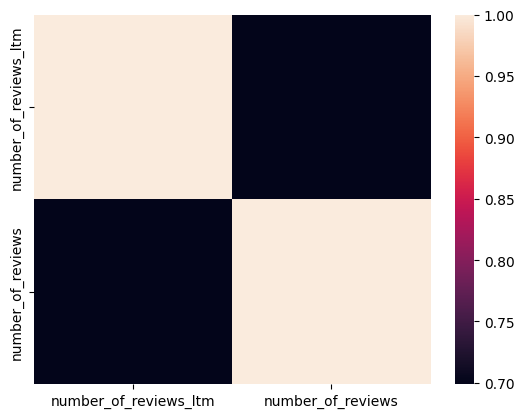

In [25]:
sns.heatmap(big_data_5[['number_of_reviews_ltm', 'number_of_reviews']].corr());

Comentario:
- Hay alta correlación entre estas dos columnas. Por lo tanto, voy a quitar la columna 'number_of_reviews_ltm'

In [26]:
big_data_5_opt = big_data_5.copy()
big_data_5_opt = big_data_5_opt.drop('number_of_reviews_ltm', axis=1)

In [27]:
big_data_5_opt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90577 entries, 0 to 90576
Data columns (total 22 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   id                                  90577 non-null  int64  
 1   minimum_nights                      90577 non-null  int64  
 2   idealista_rental(EUR/m2/month)      90577 non-null  float64
 3   ine_num_vacation_rental             90577 non-null  int64  
 4   calculated_host_listings_count      90577 non-null  int64  
 5   ine_num_tourists_vacation_rental    90577 non-null  int64  
 6   reviews_per_month                   90577 non-null  float64
 7   ine_percent_vacation_rental         90577 non-null  float64
 8   idealista_sell(EUR/m2)              90577 non-null  int64  
 9   availability_365                    90577 non-null  int64  
 10  number_of_reviews                   90577 non-null  int64  
 11  room_type                           90577

In [28]:
bm.train_random_forest(X=big_data_5_opt.iloc[:, 1:-1], y=big_data_5_opt["price"], random_state=42, 
                       path1="../data/output_optimization/big/baseline_feature_importance_redcols_2.csv",
                       path2="../data/output_optimization/big/metrics_3.csv")

c:\Users\Selvie\OneDrive\SELVIE\Lifelong Learning\The Bridge - Data Science Bootcamp\MyCode\3-Machine_Learning\Entrega\Proyecto ML\Airbnb\notebooks\../functions\run_baseline_model.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_df = metrics_df.append(pd.Series(metrics_test, index=metrics_df.columns), ignore_index=True)
c:\Users\Selvie\OneDrive\SELVIE\Lifelong Learning\The Bridge - Data Science Bootcamp\MyCode\3-Machine_Learning\Entrega\Proyecto ML\Airbnb\notebooks\../functions\run_baseline_model.py:69: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_df = metrics_df.append(pd.Series(metrics_train, index=metrics_df.columns), ignore_index=True)


(Pipeline(steps=[('scaler', StandardScaler()),
                 ('model', RandomForestRegressor(random_state=42))]),
                 Model          MSE       RMSE        MAE       MAPE        R2
 0   RandomForest_Test  3124.562402  55.897785  40.537104  42.343562  0.373077
 1  RandomForest_Train   602.450065  24.544858  16.660132  17.611503  0.880395)

Comentario:
- El MAE y el RMSE no mejoran

## 4) Optimización - Aplicar el feature importance otra vez en base al apartado 3

Mira la suma cumulativa de importancia y aplica el feature importance de las columnas reducidas del apartado 3

In [29]:
feat_imp_redcols_2 = pd.read_csv("../data/output_optimization/big/baseline_feature_importance_redcols_2.csv")
feat_imp_redcols_2 = feat_imp_redcols_2.drop("Unnamed: 0", axis=1)

In [30]:
feat_imp_redcols_2.cumsum()

,Feature,Importance
0,availability_365,0.204739
1,availability_365room_type,0.384859
2,availability_365room_typereviews_per_month,0.545871
3,availability_365room_typereviews_per_monthcalc...,0.700780
4,availability_365room_typereviews_per_monthcalc...,0.811801
5,availability_365room_typereviews_per_monthcalc...,0.890471
6,availability_365room_typereviews_per_monthcalc...,0.936151
7,availability_365room_typereviews_per_monthcalc...,0.956702
8,availability_365room_typereviews_per_monthcalc...,0.967632
9,availability_365room_typereviews_per_monthcalc...,0.975002


Las 6 primeras columnas tienen una suma cumulativa de importancia de un 0.890471. Voy a quitar el resto de las columnas.

In [31]:
feat_imp_redcols_2[:6].cumsum()

,Feature,Importance
0,availability_365,0.204739
1,availability_365room_type,0.384859
2,availability_365room_typereviews_per_month,0.545871
3,availability_365room_typereviews_per_monthcalc...,0.700780
4,availability_365room_typereviews_per_monthcalc...,0.811801
5,availability_365room_typereviews_per_monthcalc...,0.890471


In [32]:
feat_imp_redcols_2[:6]

,Feature,Importance
0,availability_365,0.204739
1,room_type,0.180121
2,reviews_per_month,0.161011
3,calculated_host_listings_count,0.154909
4,number_of_reviews,0.111021
5,minimum_nights,0.078670


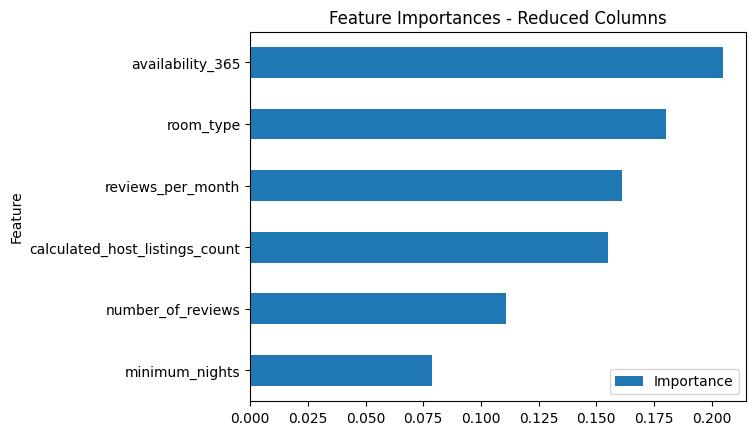

In [33]:
# Las primeras 6 columnas tienen una suma cumulativa de importancia de 0.890471
sorted_importances = feat_imp_redcols_2[:6].sort_values(by="Importance", ascending=True)
ax = sorted_importances.plot.barh(x="Feature", y="Importance")
ax.set_title("Feature Importances - Reduced Columns")
plt.show()

Vamos a entrenar otra vez el modelo con solamente 6 columnas más importantes

In [34]:
imp_cols = ["id"] + list(feat_imp_redcols_2[:6]["Feature"].unique()) + ["price"]
imp_cols

['id',
 'availability_365',
 'room_type',
 'reviews_per_month',
 'calculated_host_listings_count',
 'number_of_reviews',
 'minimum_nights',
 'price']

In [35]:
big_data_5[imp_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90577 entries, 0 to 90576
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              90577 non-null  int64  
 1   availability_365                90577 non-null  int64  
 2   room_type                       90577 non-null  float64
 3   reviews_per_month               90577 non-null  float64
 4   calculated_host_listings_count  90577 non-null  int64  
 5   number_of_reviews               90577 non-null  int64  
 6   minimum_nights                  90577 non-null  int64  
 7   price                           90577 non-null  int64  
dtypes: float64(2), int64(6)
memory usage: 5.5 MB


In [36]:
bm.train_random_forest(X=big_data_5[imp_cols].iloc[:, 1:-1], y=big_data_5[imp_cols]["price"], random_state=42, 
                       path1="../data/output_optimization/big/baseline_feature_importance_redcols_3.csv",
                       path2="../data/output_optimization/big/metrics_4.csv")

c:\Users\Selvie\OneDrive\SELVIE\Lifelong Learning\The Bridge - Data Science Bootcamp\MyCode\3-Machine_Learning\Entrega\Proyecto ML\Airbnb\notebooks\../functions\run_baseline_model.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_df = metrics_df.append(pd.Series(metrics_test, index=metrics_df.columns), ignore_index=True)
c:\Users\Selvie\OneDrive\SELVIE\Lifelong Learning\The Bridge - Data Science Bootcamp\MyCode\3-Machine_Learning\Entrega\Proyecto ML\Airbnb\notebooks\../functions\run_baseline_model.py:69: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_df = metrics_df.append(pd.Series(metrics_train, index=metrics_df.columns), ignore_index=True)


(Pipeline(steps=[('scaler', StandardScaler()),
                 ('model', RandomForestRegressor(random_state=42))]),
                 Model          MSE       RMSE        MAE       MAPE        R2
 0   RandomForest_Test  3409.448323  58.390481  42.861947  45.366230  0.315916
 1  RandomForest_Train   720.619111  26.844350  18.121041  19.454369  0.856935)

Comentario:
- El MAE y el RMSE no mejoran

#### Feature Importance (antes y después de reducir columnas que tenían bastante correlación entre ellas)

In [37]:
print(len(feat_imp))
print(len(feat_imp_redcols_2))

21
20


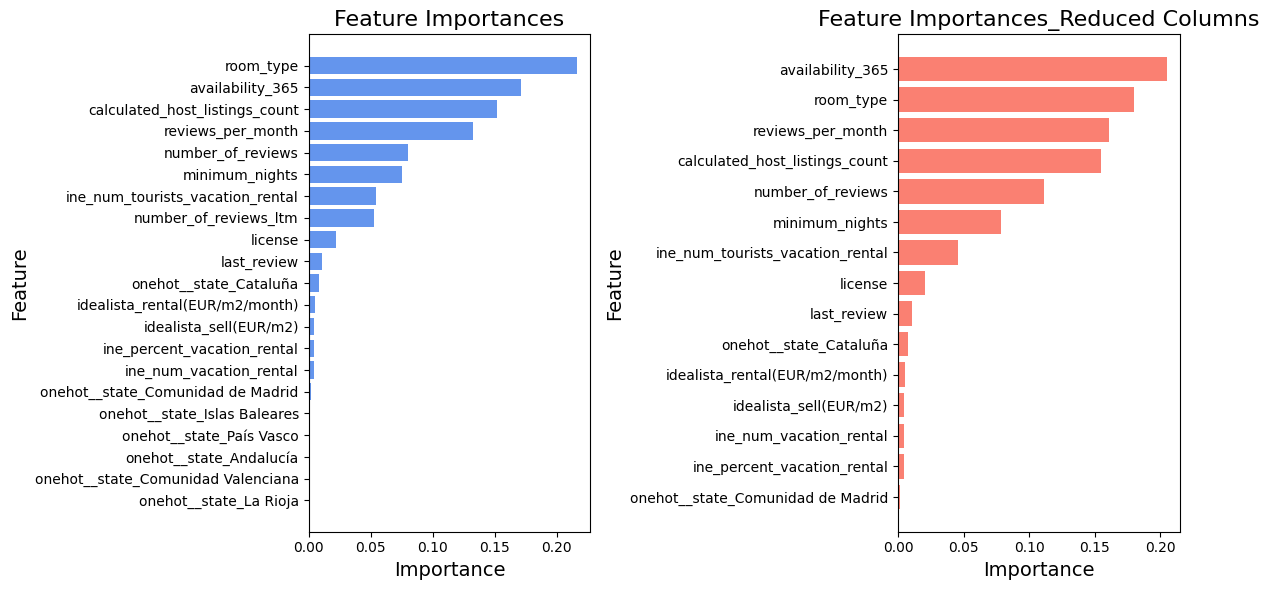

In [38]:
sorted_importances = feat_imp.sort_values(by="Importance", ascending=True)
sorted_importances_redcols = feat_imp_redcols_2[:15].sort_values(by="Importance", ascending=True)

fig, axs = plt.subplots(ncols=2, figsize=(12, 6))
axs[0].barh(sorted_importances["Feature"], sorted_importances["Importance"], color="cornflowerblue")
axs[0].set_title("Feature Importances", fontsize=16)
axs[0].set_xlabel("Importance", fontsize=14)
axs[0].set_ylabel("Feature", fontsize=14)

axs[1].barh(sorted_importances_redcols["Feature"], sorted_importances_redcols["Importance"], color="salmon")
axs[1].set_title("Feature Importances_Reduced Columns", fontsize=16)
axs[1].set_xlabel("Importance", fontsize=14)
axs[1].set_ylabel("Feature", fontsize=14)

plt.tight_layout()
plt.show()


## 5) Optimización del Random Forest con PCA

In [39]:
X = big_data_5.iloc[:, 1:-1]
y = big_data_5["price"]

# Split the data into train and test
X_train, X_test, y_train, y_test = model_selection.train_test_split(X,
                                                                    y,
                                                                    test_size=0.20,
                                                                    random_state=42)

# Standardize the data
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply PCA to reduce dimensionality
pca = PCA(n_components=10, random_state=42)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [40]:
pca.explained_variance_ratio_.cumsum()

array([0.2194976 , 0.35591905, 0.46615845, 0.55690277, 0.62326083,
       0.68187687, 0.73081868, 0.77838482, 0.82487008, 0.87115805])

In [41]:
# Create a RandomForestRegressor
rf_gs = RandomForestRegressor(random_state=42, 
                           max_depth=20, 
                           min_samples_leaf=1, 
                           min_samples_split=2, 
                           n_estimators=250)

# Train the data
rf_gs.fit(X_train_pca, y_train)

# Predict on X_test_pca data
y_pred_test = rf_gs.predict(X_test_pca)

# Get the metrics for test data
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
mape_test = mean_absolute_percentage_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)


# Predict on train set
y_pred_train = rf_gs.predict(X_train_pca)

# Get the metrics for train data
mse_train = mean_squared_error(y_train, y_pred_train)
rmse_train = np.sqrt(mse_train)
mae_train = mean_absolute_error(y_train, y_pred_train)
mape_train = np.mean(np.abs((y_train - y_pred_train) / y_train)) * 100
r2_train = r2_score(y_train, y_pred_train)

# Add the metrics to the metrics_df dataframe
metrics_test = ["RandomForest_GS_PCA_Test", mse_test, rmse_test, mae_test, mape_test, r2_test]
metrics_train = ["RandomForest_GS_PCA_Train", mse_train, rmse_train, mae_train, mape_train, r2_train]
metrics_df = pd.DataFrame(columns=["Model", "MSE", "RMSE", "MAE", "MAPE", "R2"])
metrics_df = metrics_df.append(pd.Series(metrics_test, index=metrics_df.columns), ignore_index=True)
metrics_df = metrics_df.append(pd.Series(metrics_train, index=metrics_df.columns), ignore_index=True)
metrics_df.to_csv("../data/output_optimization/big/metrics_5.csv")
metrics_df

C:\Users\Selvie\AppData\Local\Temp\ipykernel_7236\2188728113.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_df = metrics_df.append(pd.Series(metrics_test, index=metrics_df.columns), ignore_index=True)
C:\Users\Selvie\AppData\Local\Temp\ipykernel_7236\2188728113.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_df = metrics_df.append(pd.Series(metrics_train, index=metrics_df.columns), ignore_index=True)


,Model,MSE,RMSE,MAE,MAPE,R2
0,RandomForest_GS_PCA_Test,3198.093576,56.551689,41.519490,0.436321,0.358323
1,RandomForest_GS_PCA_Train,1538.729039,39.226637,28.443706,29.834608,0.694514


Comentario:
- Las métricas han empeorado utilizando PCA

## 6) Optimización - Aplicar la transformación logarítmica en el target (price)

C:\Users\Selvie\AppData\Local\Temp\ipykernel_7236\4138456953.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(big_data_5["price"]);


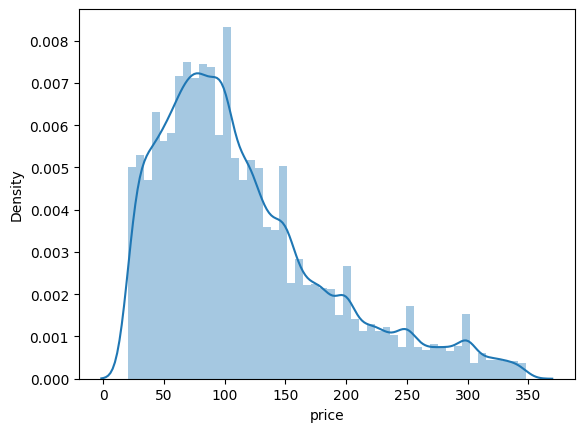

In [42]:
sns.distplot(big_data_5["price"]);

In [43]:
# Log-transform the target variable
log_price = np.log(big_data_5["price"])
big_data_5_log = big_data_5.copy()
big_data_5_log["log_price"] = log_price
big_data_5_log = big_data_5_log.drop("price", axis=1)

# Split the data into train and test sets
X = big_data_5_log.iloc[:, 1:-1]
y = big_data_5_log["log_price"]
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data 
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Train a Random Forest Regressor model with specified hyperparameters
rf_log = RandomForestRegressor(random_state=42, max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=250)
rf_log.fit(X_train, y_train)

# Make predictions on the test set
y_pred_test = rf_log.predict(X_test)

# Convert the y_pred_test and the y_test back to the original scale by taking the exponent
y_pred_test = np.exp(y_pred_test)
y_test = np.exp(y_test)

# Calculate evaluation metrics (MSE, RMSE, MAE, MAPE, R2) on the test set
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = mean_squared_error(y_test, y_pred_test, squared=False)
mae_test = mean_absolute_error(y_test, y_pred_test)
mape_test = np.mean(np.abs((y_test - y_pred_test) / y_test)) * 100
r2_test = r2_score(y_test, y_pred_test)


# Make predictions on the train set
y_pred_train = rf_log.predict(X_train)

# Convert the y_pred_train and the y_train back back to the original scale by taking the exponent
y_pred_train = np.exp(y_pred_train)
y_train = np.exp(y_train)

# Calculate evaluation metrics (MSE, RMSE, MAE, MAPE, R2) on the train set
mse_train = mean_squared_error(y_train, y_pred_train)
rmse_train = mean_squared_error(y_train, y_pred_train, squared=False)
mae_train = mean_absolute_error(y_train, y_pred_train)
mape_train = np.mean(np.abs((y_train - y_pred_train) / y_train)) * 100
r2_train = r2_score(y_train, y_pred_train)

# Add the metrics to the metrics_df dataframe
metrics_test = ["RandomForest_GS_Log_Test", mse_test, rmse_test, mae_test, mape_test, r2_test]
metrics_train = ["RandomForest_GS_Log_Train", mse_train, rmse_train, mae_train, mape_train, r2_train]
metrics_df = pd.DataFrame(columns=["Model", "MSE", "RMSE", "MAE", "MAPE", "R2"])
metrics_df = metrics_df.append(pd.Series(metrics_test, index=metrics_df.columns), ignore_index=True)
metrics_df = metrics_df.append(pd.Series(metrics_train, index=metrics_df.columns), ignore_index=True)
metrics_df.to_csv("../data/output_optimization/big/metrics_6.csv")
metrics_df

C:\Users\Selvie\AppData\Local\Temp\ipykernel_7236\320828169.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_df = metrics_df.append(pd.Series(metrics_test, index=metrics_df.columns), ignore_index=True)
C:\Users\Selvie\AppData\Local\Temp\ipykernel_7236\320828169.py:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_df = metrics_df.append(pd.Series(metrics_train, index=metrics_df.columns), ignore_index=True)


,Model,MSE,RMSE,MAE,MAPE,R2
0,RandomForest_GS_Log_Test,3080.369177,55.501074,38.180194,35.491046,0.381944
1,RandomForest_GS_Log_Train,1394.759793,37.346483,23.944261,20.626956,0.723097


Comentario:
- El MAE ha mejorado, aunque no es una mejora significativa

## 7) Optimización - Aplicar la transformación logarítmica en el target (price) y ejecuta con el dataset de columnas reducidas (7 features más importantes)

In [44]:
imp_cols

['id',
 'availability_365',
 'room_type',
 'reviews_per_month',
 'calculated_host_listings_count',
 'number_of_reviews',
 'minimum_nights',
 'price']

In [45]:
# Log-transform the target variable
log_price = np.log(big_data_5["price"])
big_data_5_log = big_data_5.copy()
big_data_5_log = big_data_5_log[imp_cols]
big_data_5_log["log_price"] = log_price
big_data_5_log = big_data_5_log.drop("price", axis=1)

# Split the data into train and test sets
X = big_data_5_log.iloc[:, 1:-1]
y = big_data_5_log["log_price"]

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data 
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Train a Random Forest Regressor model with specified hyperparameters
rf_log = RandomForestRegressor(random_state=42, max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=250)
rf_log.fit(X_train, y_train)

# Make predictions on the test set
y_pred_test = rf_log.predict(X_test)

# Convert the y_pred_test and the y_test back to the original scale by taking the exponent
y_pred_test = np.exp(y_pred_test)
y_test = np.exp(y_test)

# Calculate evaluation metrics (MSE, RMSE, MAE, MAPE, R2) on the test set
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = mean_squared_error(y_test, y_pred_test, squared=False)
mae_test = mean_absolute_error(y_test, y_pred_test)
mape_test = np.mean(np.abs((y_test - y_pred_test) / y_test)) * 100
r2_test = r2_score(y_test, y_pred_test)


# Make predictions on the train set
y_pred_train = rf_log.predict(X_train)

# Convert the y_pred_train and the y_train back back to the original scale by taking the exponent
y_pred_train = np.exp(y_pred_train)
y_train = np.exp(y_train)

# Calculate evaluation metrics (MSE, RMSE, MAE, MAPE, R2) on the train set
mse_train = mean_squared_error(y_train, y_pred_train)
rmse_train = mean_squared_error(y_train, y_pred_train, squared=False)
mae_train = mean_absolute_error(y_train, y_pred_train)
mape_train = np.mean(np.abs((y_train - y_pred_train) / y_train)) * 100
r2_train = r2_score(y_train, y_pred_train)

# Add the metrics to the metrics_df dataframe
metrics_test = ["RandomForest_GS_Log_Test", mse_test, rmse_test, mae_test, mape_test, r2_test]
metrics_train = ["RandomForest_GS_Log_Train", mse_train, rmse_train, mae_train, mape_train, r2_train]
metrics_df = pd.DataFrame(columns=["Model", "MSE", "RMSE", "MAE", "MAPE", "R2"])
metrics_df = metrics_df.append(pd.Series(metrics_test, index=metrics_df.columns), ignore_index=True)
metrics_df = metrics_df.append(pd.Series(metrics_train, index=metrics_df.columns), ignore_index=True)
metrics_df.to_csv("../data/output_optimization/big/metrics_7.csv")
metrics_df

C:\Users\Selvie\AppData\Local\Temp\ipykernel_7236\3617090802.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_df = metrics_df.append(pd.Series(metrics_test, index=metrics_df.columns), ignore_index=True)
C:\Users\Selvie\AppData\Local\Temp\ipykernel_7236\3617090802.py:58: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_df = metrics_df.append(pd.Series(metrics_train, index=metrics_df.columns), ignore_index=True)


,Model,MSE,RMSE,MAE,MAPE,R2
0,RandomForest_GS_Log_Test,3336.413251,57.761694,40.166099,37.721992,0.330570
1,RandomForest_GS_Log_Train,1729.057930,41.581942,26.965803,23.321603,0.656728


## RESUMEN

Abre las métricas del modelo base

In [46]:
res_big_5 = pd.read_csv("../data/output_data_5/metrics_big_data_no_outliers_cols_3.csv")
res_big_5[res_big_5["MAE"] == (res_big_5["MAE"].min())]

,Model,MSE,RMSE,MAE,MAPE,R2
0,RandomForest,3101.82247,55.694007,40.526673,0.424958,0.377639


Juntar las métricas de todas las pruebas de optimización

Para referencia, esta es el número de pruebas de optimización
1) Optimización del RandomForest con el Grid Search
2) Optimización del RandomForest con el Feature Importance
3) Optimización - Quitar columnas que tienen media-alta correlación
4) Optimización - Aplicar el feature importance otra vez en base al apartado 3
5) Optimización del Random Forest con PCA
6) Optimización - Aplicar la transformación logarítmica en el target (price)
7) Optimización - Aplicar la transformación logarítmica en el target (price) y ejecuta con el dataset de columnas reducidas (7 features más importantes)

In [47]:
# Create an empty DataFrame to store all the metrics
all_metrics_df = pd.DataFrame()

# Loop through all the CSV files with the specified format names
for filename in glob.glob("../data/output_optimization/big/metrics_*.csv"):
    # Read in the CSV file as a DataFrame
    metrics_df = pd.read_csv(filename, index_col=0)
    
    # Append the metrics to the all_metrics_df DataFrame
    all_metrics_df = all_metrics_df.append(metrics_df)

# # Add the number of optimization experiment
# all_metrics_df["Optimization_No"] = [i for i in range(1, 7) for _ in range(2)]

all_metrics_df["Optimization"] = ["Grid Search", "Grid Search",
                                  "Feature Importance", "Feature Importance",
                                  "Drop Med-High Corr Columns", "Drop Med-High Corr Columns",
                                  "Corr_Feature Importance", "Corr_Feature Importance",
                                  "PCA", "PCA",
                                  "Log Transformation", "Log Transformation",
                                  "Log Transform_Feat. Imp.", "Log Transform_Feat. Imp."]

# Print the concatenated DataFrame
all_metrics_df

C:\Users\Selvie\AppData\Local\Temp\ipykernel_7236\4164321253.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_metrics_df = all_metrics_df.append(metrics_df)
C:\Users\Selvie\AppData\Local\Temp\ipykernel_7236\4164321253.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_metrics_df = all_metrics_df.append(metrics_df)
C:\Users\Selvie\AppData\Local\Temp\ipykernel_7236\4164321253.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_metrics_df = all_metrics_df.append(metrics_df)
C:\Users\Selvie\AppData\Local\Temp\ipykernel_7236\4164321253.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_metrics_df = all_metrics_df.app

,Model,MSE,RMSE,MAE,MAPE,R2,Optimization
0,RandomForest_Test,3004.271876,54.811239,39.936086,41.865388,0.397212,Grid Search
1,RandomForest_Train,1176.504183,34.300207,24.227952,25.038833,0.766427,Grid Search
0,RandomForest_Test,3149.477367,56.120205,40.812764,42.810777,0.368078,Feature Importance
1,RandomForest_Train,616.585945,24.831149,16.839478,17.835819,0.877588,Feature Importance
0,RandomForest_Test,3124.562402,55.897785,40.537104,42.343562,0.373077,Drop Med-High Corr Columns
1,RandomForest_Train,602.450065,24.544858,16.660132,17.611503,0.880395,Drop Med-High Corr Columns
0,RandomForest_Test,3409.448323,58.390481,42.861947,45.366230,0.315916,Corr_Feature Importance
1,RandomForest_Train,720.619111,26.844350,18.121041,19.454369,0.856935,Corr_Feature Importance
0,RandomForest_GS_PCA_Test,3198.093576,56.551689,41.519490,0.436321,0.358323,PCA
1,RandomForest_GS_PCA_Train,1538.729039,39.226637,28.443706,29.834608,0.694514,PCA


Divide las métricas entre test y train y compáralas

In [48]:
test_metrics = all_metrics_df[all_metrics_df["Model"].str.contains("Test")]
test_metrics[test_metrics["MAE"] == test_metrics["MAE"].min()]

,Model,MSE,RMSE,MAE,MAPE,R2,Optimization
0,RandomForest_GS_Log_Test,3080.369177,55.501074,38.180194,35.491046,0.381944,Log Transformation


In [76]:
# test_metrics = test_metrics.sort_values(by=["MAE"])
test_metrics = test_metrics[['Model', 'Optimization', 'MSE', 'RMSE', 'MAE', 'MAPE', 'R2']]
test_metrics

,Model,Optimization,MSE,RMSE,MAE,MAPE,R2
0,RandomForest_Test,Grid Search,3004.271876,54.811239,39.936086,41.865388,0.397212
0,RandomForest_Test,Feature Importance,3149.477367,56.120205,40.812764,42.810777,0.368078
0,RandomForest_Test,Drop Med-High Corr Columns,3124.562402,55.897785,40.537104,42.343562,0.373077
0,RandomForest_Test,Corr_Feature Importance,3409.448323,58.390481,42.861947,45.366230,0.315916
0,RandomForest_GS_PCA_Test,PCA,3198.093576,56.551689,41.519490,0.436321,0.358323
0,RandomForest_GS_Log_Test,Log Transformation,3080.369177,55.501074,38.180194,35.491046,0.381944
0,RandomForest_GS_Log_Test,Log Transform_Feat. Imp.,3336.413251,57.761694,40.166099,37.721992,0.330570


In [50]:
train_metrics = all_metrics_df[all_metrics_df["Model"].str.contains("Train")]
train_metrics[train_metrics["MAE"] == train_metrics["MAE"].min()]

,Model,MSE,RMSE,MAE,MAPE,R2,Optimization
1,RandomForest_Train,602.450065,24.544858,16.660132,17.611503,0.880395,Drop Med-High Corr Columns


In [78]:
# train_metrics = train_metrics.sort_values(by=["MAE"])
train_metrics = train_metrics[['Model', 'Optimization', 'MSE', 'RMSE', 'MAE', 'MAPE', 'R2']]
train_metrics

,Model,Optimization,MSE,RMSE,MAE,MAPE,R2
1,RandomForest_Train,Grid Search,1176.504183,34.300207,24.227952,25.038833,0.766427
1,RandomForest_Train,Feature Importance,616.585945,24.831149,16.839478,17.835819,0.877588
1,RandomForest_Train,Drop Med-High Corr Columns,602.450065,24.544858,16.660132,17.611503,0.880395
1,RandomForest_Train,Corr_Feature Importance,720.619111,26.844350,18.121041,19.454369,0.856935
1,RandomForest_GS_PCA_Train,PCA,1538.729039,39.226637,28.443706,29.834608,0.694514
1,RandomForest_GS_Log_Train,Log Transformation,1394.759793,37.346483,23.944261,20.626956,0.723097
1,RandomForest_GS_Log_Train,Log Transform_Feat. Imp.,1729.057930,41.581942,26.965803,23.321603,0.656728


Compare train vs test

In [79]:
train_test_comp = pd.merge(train_metrics[["Optimization", "MAE", "MAPE", "RMSE", "R2"]], test_metrics[["Optimization", "MAE", "MAPE", "RMSE", "R2"]], 
                           on="Optimization", how="left")
train_test_comp = train_test_comp.rename({"MAE_x": "MAE_Train",
                                          "MAE_y": "MAE_Test",
                                          "MAPE_x": "MAPE_Train",
                                          "MAPE_y": "MAPE_Test",
                                          "RMSE_x": "RMSE_Train",
                                          "RMSE_y": "RMSE_Test",
                                          "R2_x": "R2_Train",
                                          "R2_y": "R2_Test"}, axis=1)
train_test_comp = train_test_comp[["Optimization", "MAE_Test", "MAE_Train", "MAPE_Test", "MAPE_Train", "RMSE_Test", "RMSE_Train",
                                   "R2_Test", "R2_Train"]]
# train_test_comp = train_test_comp.sort_values(by="MAE_Test").reset_index().drop("index", axis=1)
train_test_comp

,Optimization,MAE_Test,MAE_Train,MAPE_Test,MAPE_Train,RMSE_Test,RMSE_Train,R2_Test,R2_Train
0,Grid Search,39.936086,24.227952,41.865388,25.038833,54.811239,34.300207,0.397212,0.766427
1,Feature Importance,40.812764,16.839478,42.810777,17.835819,56.120205,24.831149,0.368078,0.877588
2,Drop Med-High Corr Columns,40.537104,16.660132,42.343562,17.611503,55.897785,24.544858,0.373077,0.880395
3,Corr_Feature Importance,42.861947,18.121041,45.366230,19.454369,58.390481,26.844350,0.315916,0.856935
4,PCA,41.519490,28.443706,0.436321,29.834608,56.551689,39.226637,0.358323,0.694514
5,Log Transformation,38.180194,23.944261,35.491046,20.626956,55.501074,37.346483,0.381944,0.723097
6,Log Transform_Feat. Imp.,40.166099,26.965803,37.721992,23.321603,57.761694,41.581942,0.330570,0.656728


Guarda el mejor modelo

In [80]:
# Save the model using pickle
with open("big_best_model.pkl", "wb") as f:
    pickle.dump(rf_log, f)

## Análisis

### Modelos

Desde el punto de vista técnica:
- Después de hacer varias pruebas para optimizar el modelo base, el mejor MAE en test se conseguió cuando:
	- le apliqué la transformación logarítmica al target (price)
	- utilicé el baseline model (Random Forest Regressor) con los mejores hipérparámetros de Grid Search del dataset pequeño.
<br><br>
- El MAE después de optimizar es 38.18 que es mejor que el MAE del modelo base (MAE: 40.53). Mientras el RMSE de este modelo optimizado es 55.50 con lo cual es un poco más alto que él del modelo base (RMSE: 54.81). 
<br><br>
- Hay overfitting porque me salió un error más grande en test que en el train, pero no se puede bajar más el error después de varias pruebas distintas. He mirado un trabajo similar de otra gente en este [link](https://github.com/yoojin-kathleen/airbnb-price/blob/main/Team_11_Airbnb.ipynb) que hizo una predicción en el caso de Airbnb EE.UU y obtuvieron un MAE de 50-58 (depende del modelo) sobre el precio promedio de 184 que es más o menos igual que las métricas he obtenido. Si tuviese más datos con más features, quizás podría obtener mejores métricas.
<br><br>
- Después de reducir las columnas menos significativas, hay 15 features que contibuyen un 86% (suma cumulativa) al rendimiento del modelo. Sin embargo, entrenando con sólo esos 15 features no mejora el MAE y el RMSE.

Desde el punto de vista de negocio:
- Hay un margen de error de 38 EUR approximadamente lo que sigfinifica que el precio de alquiler puede ser 38 EUR más o 38 EUR menos del precio real. Por ejemplo, si cogemos el precio promedio de 116 EUR/noche, el margen será entre 78 y 154 EUR/noche. El número promedio de dormitorios es 2, así que, sería entre 39 EUR/noche/dormitorio y 77 EUR/noche/dormitorio, lo que coincide con lo que dice Airbnb en su [página web](https://www.airbnb.es/host/homes?room_type=PRIVATE_ROOM&adults=2).

Recomendación:
- Si un propietario quiere alquilar su alojamiento a corto plazo, se aconsejaría utilizar el límite superior del precio que es un 154 EUR/noche (para un alojamiento de 2 dormitorios). Así, con la tasa aproximada de ocupación de un 80% (suponiendo que es un alquiler de verano de 3 meses), podría ganar aprox. 11.000 EUR/año bruto.
- Si un propietario quiere alquilar su alojamiento a largo plazo,  se aconsejaría utilizar el límite inferior del precio que es un 78 EUR/noche (para un alojamiento de 2 dormitorios). Así, con la tasa aproximada de ocupación de un 60%, podría ganar aprox. 17.000 EUR/año bruto. Se puede consultar al cálculo de abajo para más detalle.

### Cálculo del precio de alquiler de Aibrnb

In [54]:
occupancy_rate = [("Jan", 0.5),
                  ("Feb", 0.5),
                  ("Mar", 0.5),
                  ("Apr", 0.5),
                  ("May", 0.5),
                  ("Jun", 0.8),
                  ("Jul", 0.8),
                  ("Aug", 0.8),
                  ("Sep", 0.5),
                  ("Oct", 0.5),
                  ("Nov", 0.5),
                  ("Dec", 0.5)]

occupancy_rate_df = pd.DataFrame(occupancy_rate, columns=["Month", "Occupancy Rate"])
occupancy_rate_df

,Month,Occupancy Rate
0,Jan,0.5
1,Feb,0.5
2,Mar,0.5
3,Apr,0.5
4,May,0.5
5,Jun,0.8
6,Jul,0.8
7,Aug,0.8
8,Sep,0.5
9,Oct,0.5


In [60]:
summer = ("Jun", "Jul", "Aug")

occup_rate_short = round(occupancy_rate_df[occupancy_rate_df["Month"].isin(summer)]["Occupancy Rate"].mean(), 1)
print("Tasa de ocupación-corto plazo:", occup_rate_short)
occup_rate_long = round(occupancy_rate_df["Occupancy Rate"].mean(), 1)
print("Tasa de ocupación-largo plazo:", occup_rate_long, "\n")

avg_price = round(big_data_5["price"].mean(), 0)
print("Precio promedio (EUR/noche):", avg_price)

error_margin = round(test_metrics[test_metrics["MAE"] == test_metrics["MAE"].min()]["MAE"].values[0], 0)
print("Margen de error (EUR/noche):", error_margin)

lower_price_limit = avg_price - error_margin
upper_price_limit = avg_price + error_margin
print("Límite inferior de precio (EUR/noche):", lower_price_limit)
print("Límite superior de precio (EUR/noche):", upper_price_limit)


Tasa de ocupación-corto plazo: 0.8
Tasa de ocupación-largo plazo: 0.6 

Precio promedio (EUR/noche): 116.0
Margen de error (EUR/noche): 38.0
Límite inferior de precio (EUR/noche): 78.0
Límite superior de precio (EUR/noche): 154.0


In [61]:
availability_days = [30, 60, 90, 365]

lower_profit_rental = []
upper_profit_rental = []

for i in availability_days:
    low = round((lower_price_limit * i * occup_rate_long), 0)
    lower_profit_rental.append(low)
    high = round((upper_price_limit * i * occup_rate_short), 0)
    upper_profit_rental.append(high)

print(lower_profit_rental)

print(upper_profit_rental)


[1404.0, 2808.0, 4212.0, 17082.0]
[3696.0, 7392.0, 11088.0, 44968.0]


In [62]:
rental_profit_all = pd.DataFrame(columns=["availability_30", "availability_60", "availability_90",
                                          "availability_365"])
rental_profit_all = rental_profit_all.append(pd.Series(lower_profit_rental, index=rental_profit_all.columns), ignore_index=True)
rental_profit_all = rental_profit_all.append(pd.Series(upper_profit_rental, index=rental_profit_all.columns), ignore_index=True)
rental_profit_all["Price(EUR/night)-2_bedrooms"] = [lower_price_limit, upper_price_limit]
rental_profit_all["Price Limit"] = ["Lower price limit_long term", "Upper price limit_short term"]
rental_profit_all = rental_profit_all[["Price Limit", "Price(EUR/night)-2_bedrooms", "availability_30", "availability_60", "availability_90", 
                                       "availability_365"]]
rental_profit_all

C:\Users\Selvie\AppData\Local\Temp\ipykernel_7236\459540907.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rental_profit_all = rental_profit_all.append(pd.Series(lower_profit_rental, index=rental_profit_all.columns), ignore_index=True)
C:\Users\Selvie\AppData\Local\Temp\ipykernel_7236\459540907.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rental_profit_all = rental_profit_all.append(pd.Series(upper_profit_rental, index=rental_profit_all.columns), ignore_index=True)


,Price Limit,Price(EUR/night)-2_bedrooms,availability_30,availability_60,availability_90,availability_365
0,Lower price limit_long term,78.0,1404.0,2808.0,4212.0,17082.0
1,Upper price limit_short term,154.0,3696.0,7392.0,11088.0,44968.0


In [63]:
long_rental_profit = rental_profit_all.loc[0, "availability_365"]
print("Beneficio bruto aprox-largo plazo (EUR/año):", long_rental_profit)

short_rental_profit = rental_profit_all.loc[1, "availability_90"]
print("Beneficio bruto aprox-corto plazo (EUR/año):", short_rental_profit)

Beneficio bruto aprox-largo plazo (EUR/año): 17082.0
Beneficio bruto aprox-corto plazo (EUR/año): 11088.0


### Feature Importances

Los factores que más influyen en el precio (88% de contribución) son:
- disponibilidad (30, 60, 90, 365) --> los priopietarios de Airbnb tienen flexibilidad de gestionar la disponibilidad de su alojamiento. Sin embargo, hay una regulación de días de disponibilidad. Si un alojamiento tiene una disponibilidad de 30 a 90, sólo puede estar alquilado a corto plazo (30 significa 30 días al año, 90 significa 90 días al año). Una vez que haya alcanzado su límite, Airbnb cerrará automáticamente las reservas de su propiedad hasta el final del año calendario. El límite de 90 días se aplica tanto a 90 días consecutivos como a 90 días repartidos a lo largo del año.
- tipo de alojamiento (habitación compartida, habitación privada, habitación de hotel, casa/piso entero)
- número de reseñas --> cuanto más reseñas tenga un alojamiento, más demandado será porque la gente se alojó allí y le dejaron sus reseñas. Así que, es normal si el precio de un alojamiento más demandado sería más alto.
- duración de estancia requerida --> un alojamiento que requiere una estancia mínima de 1 noche sería un poquito más caro que uno con requerimiento de 30 noches.
- número de viajeros alojados en alojamientos turísticos (datos externos del INE) --> estos datos representan la demanda de los alojamientos turísticos de cada comunidad

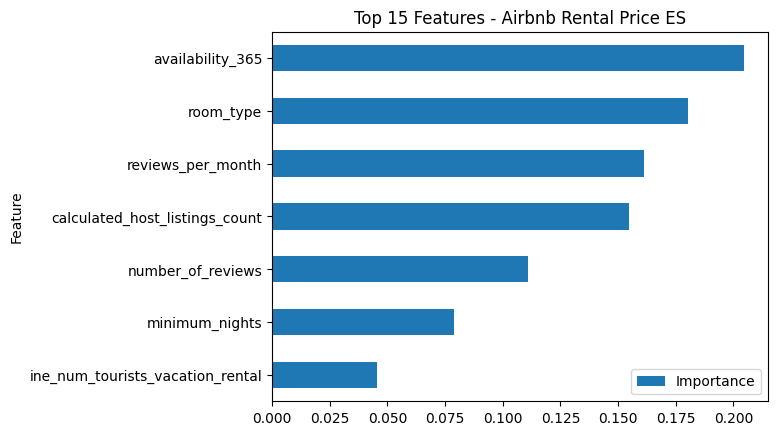

In [64]:
# Las primeras 15 columnas tienen una suma cumulativa de importancia de 0.881349
sorted_importances = feat_imp_redcols_2[:7].sort_values(by="Importance", ascending=True)
ax = sorted_importances.plot.barh(x="Feature", y="Importance")
ax.set_title("Top 15 Features - Airbnb Rental Price ES")
plt.show()

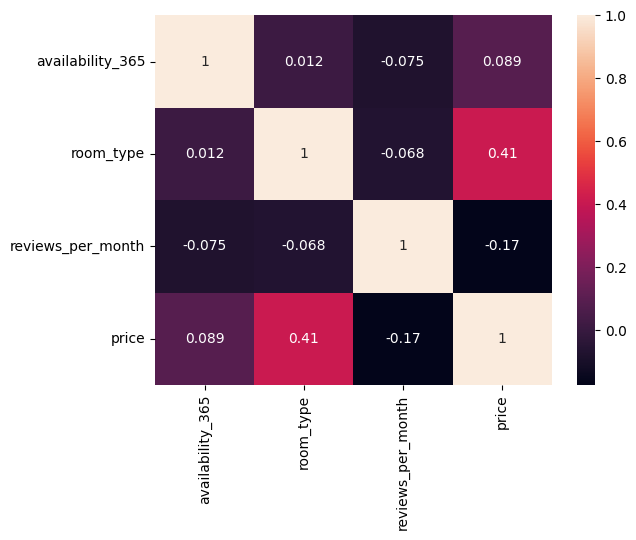

In [65]:
sns.heatmap(big_data_5[["availability_365", "room_type", "reviews_per_month", "price"]].corr(),
            annot=True);

In [66]:
big_data_5["price"].describe()

count    90577.000000
mean       115.982490
std         70.897462
min         20.000000
25%         64.000000
50%         99.000000
75%        150.000000
max        348.000000
Name: price, dtype: float64

Mira la distribución de precios

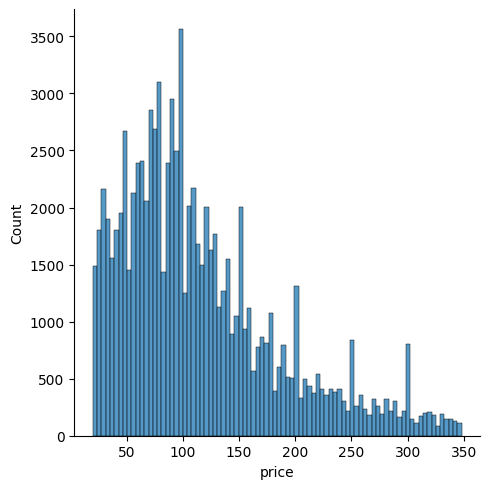

In [67]:
sns.displot(big_data_5["price"]);

Comentario:
- Los precios muestran una distribución sesgada a la derecha

Mira cuántos alojamientos tienen licencia turística

In [68]:
big_data_5.groupby("license")["id"].count()

license
0.0    36961
1.0    53616
Name: id, dtype: int64

In [69]:
big_data_5.groupby("license")["id"].count().sum()

90577

In [70]:
53616/90577

0.5919383507954558

Comentario:
- Hay un 60% de alojamientos que tienen licencia turística.

Mira cuánto es el precio de alojamientos sin licencia y con licencia

In [71]:
big_data_5.groupby("license")["price"].mean()

license
0.0     97.759043
1.0    128.545098
Name: price, dtype: float64

In [72]:
big_data_5.groupby("license")["price"].median()

license
0.0     80.0
1.0    110.0
Name: price, dtype: float64

Referencias:
- Airbnb 90-day availability rule: [link1](https://www.elconfidencial.com/economia/2018-09-29/solo-el-15-de-los-airbnb-madrilenos-es-mas-rentable-que-los-alquileres-a-largo-plazo_1620414/), [link2](https://www.theupperkey.com/post/what-is-the-airbnb-90-day-rule#:~:text=The%20first%20option%20is%20to,fully%20compliant%20with%20the%20regulations.), [link3](https://www.houst.com/knowledge/the-90-day-airbnb-rule-and-what-it-means-to-you#:~:text=This%20means%20a%20property%20can,days%20spread%20throughout%20the%20year.)
- Airbnb ML Study Case: [Airbnb US](https://github.com/yoojin-kathleen/airbnb-price/blob/main/Team_11_Airbnb.ipynb)